In [2]:
%matplotlib inline

In [3]:
from skimage.io import imread
image = imread('C:/Tomato/Parrot.jpg')

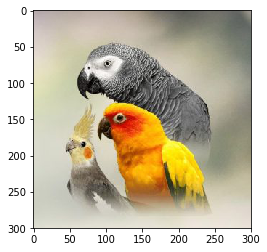

In [4]:
import pylab
pylab.imshow(image)


In [120]:
import skimage
import numpy as np
fl_im = skimage.img_as_float(image)
new = fl_im.transpose(2,0,1).reshape(3,-1)
fl_im

array([[[0.70196078, 0.65490196, 0.6627451 ],
        [0.70196078, 0.65490196, 0.6627451 ],
        [0.70196078, 0.65490196, 0.6627451 ],
        ...,
        [0.60392157, 0.58431373, 0.56078431],
        [0.61568627, 0.59607843, 0.57254902],
        [0.62745098, 0.6       , 0.57647059]],

       [[0.70588235, 0.65882353, 0.66666667],
        [0.70588235, 0.65882353, 0.66666667],
        [0.70588235, 0.65882353, 0.66666667],
        ...,
        [0.6       , 0.58039216, 0.55686275],
        [0.61176471, 0.59215686, 0.56862745],
        [0.61568627, 0.59607843, 0.57254902]],

       [[0.71764706, 0.67058824, 0.67843137],
        [0.71372549, 0.66666667, 0.6745098 ],
        [0.71372549, 0.66666667, 0.6745098 ],
        ...,
        [0.59215686, 0.57254902, 0.54901961],
        [0.60392157, 0.58431373, 0.56078431],
        [0.61176471, 0.59215686, 0.56862745]],

       ...,

       [[0.85882353, 0.85882353, 0.81176471],
        [0.85882353, 0.85882353, 0.81176471],
        [0.8627451 , 0

In [6]:
import pandas as pd
df = pd.DataFrame(new, index = [raws], columns = range(90000) )
df = df.transpose()
print(df.median())
print(df.mean())

R    0.764706
G    0.698039
B    0.580392
dtype: float64
R    0.699565
G    0.650055
B    0.529935
dtype: float64


In [8]:
from sklearn.cluster import KMeans
clf = KMeans(init = 'k-means++', random_state= 241)
clf.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [66]:
r_mn = clf.cluster_centers_[:,0].mean()
g_mn = clf.cluster_centers_[:,1].mean()
b_mn = clf.cluster_centers_[:,2].mean()

r_mdn = np.median(clf.cluster_centers_[:,0])
g_mdn = np.median(clf.cluster_centers_[:,1])
b_mdn = np.median(clf.cluster_centers_[:,2])

mean = np.asarray([[r_mn,g_mn,b_mn]])
median = np.asarray([[r_mdn,g_mdn,b_mdn]])


In [129]:
mes1 = []
mes2 = []
ar = np.array(df)
d1,d2 = 0,0
for j in range(90000):
    for i in range(0,3):
        d1 += (ar[j,i] - mean[0,i])**2
d1 = d1/(3*90000)    
for j in range(90000):
    for i in range(0,3):
        d2 += (ar[j,i] - median[0,i])**2
d2 = d2/(3*90000)
print(d1,d2)

0.05317017822274278 0.048911623138528156


In [151]:
import math
psnr_mean = []
for i in range(1,255):
    psnr_mean.append(20*math.log10(i/math.sqrt(d1)))
psnr_med = []
for i in range(1,255):
    psnr_med.append(20*math.log10(i/math.sqrt(d2)))
pmd = np.asarray(psnr_med)
pm = np.asarray(psnr_mean)
print(np.where(pmd == np.amax(pmd)), pmd[253], pmd.max())

print(np.where(pm == np.amax(pm)), pm[253], pm.max())

(array([253], dtype=int64),) 61.20255358061007 61.20255358061007
(array([253], dtype=int64),) 60.83999317198332 60.83999317198332


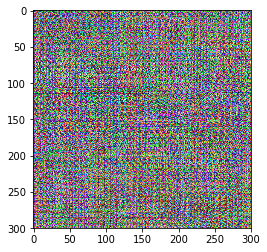

In [94]:
exp = pd.DataFrame(np.asarray(mes2).reshape(90000,3))
exp = np.asarray(mes2).reshape(300,300,3)
from PIL import Image
img = Image.fromarray(exp, 'RGB')
pylab.imshow(img)

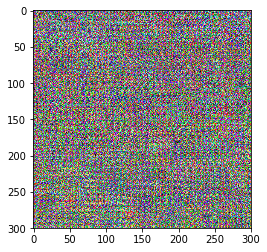

In [97]:
exp1 = pd.DataFrame(np.asarray(mes1).reshape(90000,3))
exp1 = np.asarray(mes1).reshape(300,300,3)
from PIL import Image
img1 = Image.fromarray(exp1, 'RGB')
pylab.imshow(img1)

[0.74353583 0.51955002 0.59437696 0.18338241 0.63376331 0.40587767
 0.82752431 0.39730637]
